# GTSRB classification with CNN - Model loading and prediction

Inspired by the [GTSRB Fidle tutorial](https://fidle.cnrs.fr/w3/)

## 1. Imports

In [1]:
import torch
import utils

from torch.utils.data import DataLoader, TensorDataset

## 2. Parameters

In [2]:
enhanced_dir = './prepared_data'
# dataset_name = 'set-24x24-L'
dataset_name = 'set-48x48-L-LHE'
model_name   = utils.ModelName.SMALL
batch_size   = 64
num_epochs   = 64

## 3. Load dataset

x_train.shape = (12630, 48, 48, 1)
y_train.shape = (12630,)


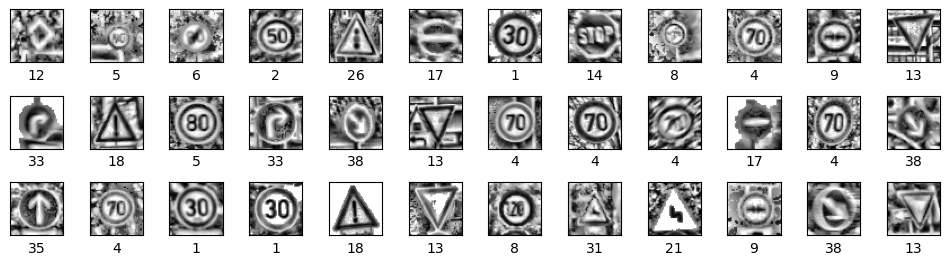

In [3]:
_, _, data, labels, meta_data, meta_labels = utils.load_dataset(enhanced_dir, dataset_name)

print(f'x_train.shape = {data.shape}')
print(f'y_train.shape = {labels.shape}')
utils.plot_imgs(36, 12, data[:36], labels[:36])

dataset  = TensorDataset(torch.tensor(data, dtype=torch.float32), torch.tensor(labels, dtype=torch.int64))
loader   = DataLoader(dataset, batch_size=batch_size, shuffle=False)

## 4. Load model

In [4]:
model_path = f'./models/{model_name}_{str(dataset_name)}_{batch_size}_{num_epochs}.pth'

model = utils.get_model(model_name, data.shape[1], data.shape[2], data.shape[3])
model.load_state_dict(torch.load(model_path, weights_only=True))
display(model)

SmallModel(
  (conv1): Conv2d(1, 96, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop1): Dropout(p=0.2, inplace=False)
  (conv2): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop2): Dropout(p=0.2, inplace=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=19200, out_features=1024, bias=True)
  (drop3): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=1024, out_features=43, bias=True)
)

## 5. Predict

Accuracy = 0.87


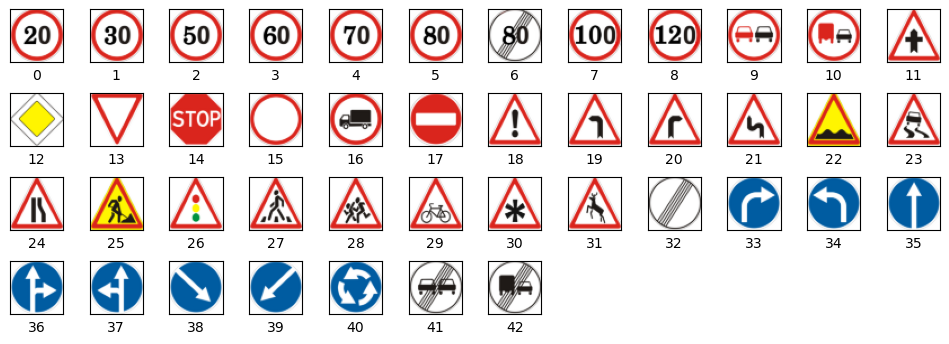

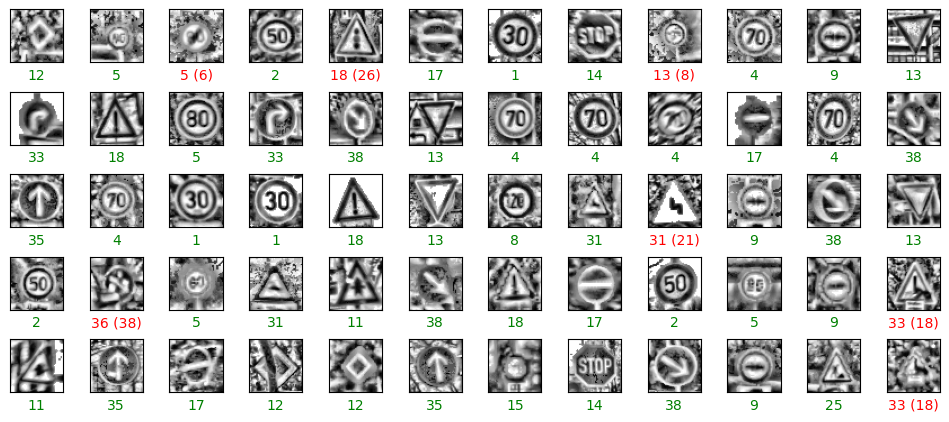

In [5]:
images = []
labels = []
preds  = []

# Make predictions
model.eval()
with torch.no_grad():
	for data, target in loader:
		data   = data.permute(0, 3, 1, 2)
		output = model(data)
		pred   = output.argmax(dim=1)
		images.append(data.permute(0, 2, 3, 1))
		labels.append(target)
		preds.append(pred)

images = torch.cat(images, dim=0)
labels = torch.cat(labels, dim=0)
preds  = torch.cat(preds, dim=0)

# Print some metrics
accuracy = (preds == labels).float().mean().item()
print(f'Accuracy = {accuracy:.2f}')

# Plot some images
utils.plot_imgs(43, 12, meta_data[:43], meta_labels[:43])
utils.plot_imgs(60, 12, images[:60], labels[:60], preds[:60])